In [1]:
import sys,os
sys.modules["mpi4py"] = None

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
	
from lenstools import dataExtern
from lenstools.statistics.ensemble import Series,Ensemble
from lenstools.statistics.constraints import Emulator
from lenstools.statistics.contours import ContourPlot

/home/alexandre/Desktop/Projects/LensTools/lenstools/utils/mpi.py:15: UserWarning: Could not import mpi4py! (if you set sys.modules['mpi4py']=None please disregard this message)
  warnings.warn(wmsg)


### Unpickle the emulator, data and covariance matrix

In [19]:
emulator = Emulator.read(os.path.join(dataExtern(),"sample","emulator.pkl"))
test_data = pd.read_pickle(os.path.join(dataExtern(),"sample","data.pkl"))
covariance = Ensemble.read(os.path.join(dataExtern(),"sample","covariance.pkl"))
emulator

parameters                     power_spectrum                              \
           Om         w    sigma8             l0            l1            l2   
0    0.306061 -1.338384  0.775758   1.092102e-08  4.673225e-09  2.700730e-09   
1    0.469697 -1.065657  0.584848   8.168778e-09  3.773505e-09  2.229031e-09   
2    0.424242 -0.823232  0.705051   1.044403e-08  4.769577e-09  2.846818e-09   
3    0.215152 -1.166667  1.079798   1.639771e-08  6.880101e-09  4.084424e-09   
4    0.254545 -1.237374  0.888889   1.247578e-08  5.207387e-09  3.016177e-09   
..        ...       ...       ...            ...           ...           ...   
95   0.472727 -1.378788  0.924242   2.095433e-08  1.023716e-08  6.433695e-09   
96   0.493939 -1.207071  1.002020   2.491008e-08  1.239983e-08  7.929529e-09   
97   0.290909 -1.479798  0.903030   1.473215e-08  6.394151e-09  3.767484e-09   
98   0.390909 -0.954545  0.938384   1.781863e-08  8.321540e-09  5.138579e-09   
99   0.478788 -1.217172  0.832323   1.698821e-08  8.209422e-09  5.095125e-09   

                                                            ...                \
              l3            l4            l5            l6  ...           l29   
0   1.823823e-09  1.350800e-09  1.061558e-09  8.678175e-10  ...  1.160386e-10   
1   1.511291e-09  1.117160e-09  8.750960e-10  7.133486e-10  ...  1.020329e-10   
2   1.962039e-09  1.474669e-09  1.172308e-09  9.675632e-10  ...  1.412898e-10   
3   2.843701e-09  2.158506e-09  1.726093e-09  1.427266e-09  ...  1.711476e-10   
4   2.053593e-09  1.533479e-09  1.213033e-09  9.963533e-10  ...  1.283789e-10   
..           ...           ...           ...           ...  ...           ...   
95  4.613350e-09  3.572235e-09  2.903117e-09  2.435521e-09  ...  3.611202e-10   
96  5.766504e-09  4.512986e-09  3.696508e-09  3.118964e-09  ...  4.650219e-10   
97  2.588778e-09  1.943971e-09  1.543560e-09  1.271372e-09  ...  1.673291e-10   
98  3.653920e-09  2.815788e-09  2.280857e-09  1.908477e-09  ...  2.722452e-10   
99  3.614618e-09  2.775972e-09  2.242536e-09  1.873356e-09  ...  2.801180e-10   

                                                                          \
             l30           l31           l32           l33           l34   
0   1.100709e-10  1.045279e-10  9.932475e-11  9.452827e-11  9.005327e-11   
1   9.715170e-11  9.260429e-11  8.832554e-11  8.436570e-11  8.065960e-11   
2   1.342791e-10  1.277523e-10  1.216149e-10  1.159414e-10  1.106370e-10   
3   1.613689e-10  1.523354e-10  1.438923e-10  1.361638e-10  1.289931e-10   
4   1.214861e-10  1.150964e-10  1.091080e-10  1.036019e-10  9.847540e-11   
..           ...           ...           ...           ...           ...   
95  3.425795e-10  3.253416e-10  3.091493e-10  2.942082e-10  2.802603e-10   
96  4.408938e-10  4.184717e-10  3.974175e-10  3.780023e-10  3.598870e-10   
97  1.584295e-10  1.501755e-10  1.424366e-10  1.353166e-10  1.286842e-10   
98  2.579363e-10  2.446488e-10  2.321791e-10  2.206902e-10  2.099776e-10   
99  2.659821e-10  2.528288e-10  2.404652e-10  2.290446e-10  2.183740e-10   

                                                            
             l35           l36           l37           l38  
0   8.580812e-11  8.193776e-11  7.824112e-11  7.480611e-11  
1   7.713693e-11  7.390806e-11  7.081923e-11  6.793734e-11  
2   1.055984e-10  1.009892e-10  9.658264e-11  9.247802e-11  
3   1.222143e-10  1.160912e-10  1.102587e-10  1.048765e-10  
4   9.361851e-11  8.920588e-11  8.499562e-11  8.109364e-11  
..           ...           ...           ...           ...  
95  2.670239e-10  2.549475e-10  2.434115e-10  2.326879e-10  
96  3.427015e-10  3.270362e-10  3.120759e-10  2.981788e-10  
97  1.223986e-10  1.166834e-10  1.112290e-10  1.061710e-10  
98  1.998191e-10  1.905689e-10  1.817376e-10  1.735402e-10  
99  2.082423e-10  1.989851e-10  1.901383e-10  1.819055e-10  

[100 rows x 42 columns]

### Map the likelihood in the $(\Omega_m,\sigma_8)$ plane

In [20]:
test_data

power_spectrum  l0     9.478402e-09
                l1     3.882573e-09
                l2     2.214367e-09
                l3     1.490437e-09
                l4     1.103983e-09
                l5     8.685329e-10
                l6     7.108571e-10
                l7     5.987327e-10
                l8     5.146678e-10
                l9     4.493873e-10
                l10    3.971552e-10
                l11    3.544313e-10
                l12    3.187686e-10
                l13    2.887353e-10
                l14    2.629345e-10
                l15    2.406765e-10
                l16    2.211483e-10
                l17    2.039942e-10
                l18    1.888458e-10
                l19    1.753220e-10
                l20    1.631951e-10
                l21    1.522741e-10
                l22    1.423975e-10
                l23    1.334285e-10
                l24    1.252504e-10
                l25    1.177669e-10
                l26    1.109765e-10
                l27    1.047

In [18]:
p = Ensemble.meshgrid({"Om":np.linspace(0.2,0.5,50),"sigma8":np.linspace(0.6,0.9,50)})
p["w"] = -1.
scores = emulator.score(p,test_data,features_covariance=covariance,correct=1000)
scores["likelihood"] = np.exp(-0.5*scores[emulator.feature_names[0]])
scores

,Om,w,sigma8,power_spectrum,likelihood
0,0.2,-1.0,0.600000,153.302387,5.138184e-34
1,0.2,-1.0,0.606122,149.030545,4.349390e-33
2,0.2,-1.0,0.612245,144.810005,3.588450e-32
3,0.2,-1.0,0.618367,140.639501,2.887489e-31
4,0.2,-1.0,0.624490,136.517287,2.268024e-30
...,...,...,...,...,...
2495,0.5,-1.0,0.875510,1944.184248,0.000000e+00
2496,0.5,-1.0,0.881633,2035.680108,0.000000e+00
2497,0.5,-1.0,0.887755,2129.987279,0.000000e+00
2498,0.5,-1.0,0.893878,2227.158957,0.000000e+00


### Approximate the emulator linearly around the maximum (Fisher matrix)

In [16]:
fisher = emulator.approximate_linear(center=(0.26,-1.,0.8))

#Consider (OmegaM,sigma8) only
fisher.pop(("parameters","w"))
fisher = fisher.iloc[[0,1,3]]

### MCMC sampling of $(\Omega_m,\sigma_8)$

In [5]:
samples = emulator.sample_posterior(test_data,features_covariance=covariance,correct=1000,pslice={"w":-1},sample="emcee")[emulator.feature_names[0]]

### Plot

/home/alexandre/Desktop/Projects/LensTools/lenstools/statistics/contours.py:779: UserWarning: The following kwargs were not used by contour: 'aspect'
  self.contour = self.ax.contour(likelihood,values,colors=colors,origin="lower",extent=extent,aspect="auto",**kwargs)
/home/alexandre/Desktop/Projects/LensTools/lenstools/statistics/constraints.py:585: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._derivatives = self.__class__(derivatives,index=[self.parameter_names[n] for n in par_varied],columns=self[self.feature_names].columns)


(0.6, 0.9)

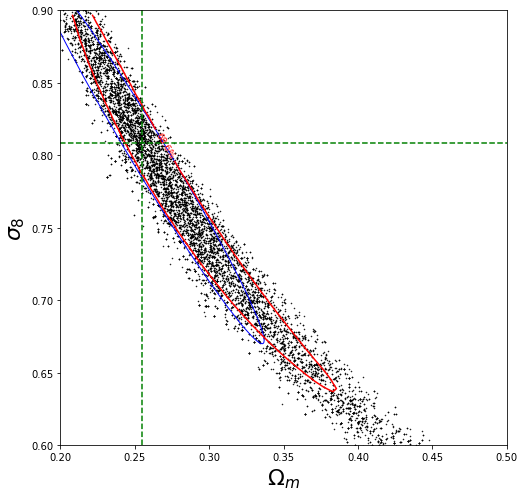

In [17]:
#Plot setup
fig,ax = plt.subplots(figsize=(8,8))

#Likelihood map
contour = ContourPlot.from_scores(scores,parameters=["Om","sigma8"],feature_names=["likelihood"],plot_labels=[r"$\Omega_m$",r"$\sigma_8$"],fig=fig,ax=ax)
p_value = 0.684
contour.getLikelihoodValues([p_value],precision=0.01)
contour.plotContours(colors=["red"])
contour.labels()

#Fisher confidence ellipse
ellipse = fisher.confidence_ellipse(covariance,correct=1000,observed_feature=test_data,parameters=["Om","sigma8"],p_value=p_value,fill=False,edgecolor="blue")
ax.add_artist(ellipse)

#MCMC samples
ax.scatter(samples["Om"],samples["sigma8"],marker=".",color="black",s=1)
ax.set_xlim(0.2,0.5)
ax.set_ylim(0.6,0.9)